In [3]:
from dolo import *
from dolo.algos.egm import egm
from matplotlib import pyplot as plt  # or import matplotlib.pyplot as plt

import numpy as np
import os
import seaborn
from pathlib import Path
import sys

# Set matplotlib backend based on environment
import matplotlib
if not sys.stdout.isatty() or os.environ.get('DISPLAY') is None:
    # We're in a non-interactive environment (no terminal or display)
    matplotlib.use('Agg')
import matplotlib.pyplot as plt
from dolo import *
from dolo.algos.egm import egm

def set_cwd_to_script_or_notebook():
    try:
        # Check if running in Jupyter notebook
        if "__file__" not in globals():
            # If `__file__` is not available, assume Jupyter notebook
            notebook_dir = Path.cwd()  # Use the current notebook's directory
            print(f"Detected Jupyter environment. Setting CWD to: {notebook_dir}")
        else:
            # If `__file__` exists, use the script's directory
            notebook_dir = Path(__file__).parent.resolve()
            print(f"Detected script environment. Setting CWD to: {notebook_dir}")
        
        # Set the CWD
        os.chdir(notebook_dir)
        print("Current working directory set to:", os.getcwd())
    except Exception as e:
        print(f"Failed to set the current working directory: {e}")

# Call the function
set_cwd_to_script_or_notebook()
dolo.__file__



Detected Jupyter environment. Setting CWD to: /Volumes/Sync/GitHub/EconForge/dolo/examples/notebooks
Current working directory set to: /Volumes/Sync/GitHub/EconForge/dolo/examples/notebooks


'/Volumes/Sync/GitHub/EconForge/dolo/dolo/__init__.py'

In [2]:
model = yaml_import("../models/consumption_savings_iid_egm.yaml")

KeyError: 'auxiliary_direct_egm'

In [ ]:
a_grid = np.linspace(0.1, 10, 100)**2  # Quadratic spacing gives more points near origin\n

dr = egm(model,a_grid=a_grid)



KeyError: 'auxiliary_direct_egm'

One can also try the faster version

## Stochastic Simulations

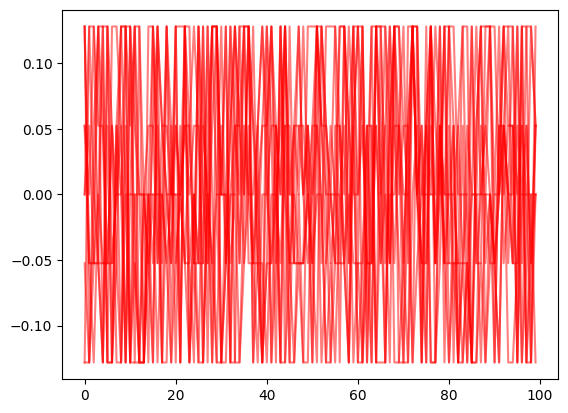

In [4]:
# Shocks are discretized as a markov chain by default:
dp = model.exogenous.discretize()
sim_shock = dp.simulate(10, 100, i0=1)
for i in range(10):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)

In [5]:
sim = simulate(model, dr, i0=1, N=100)

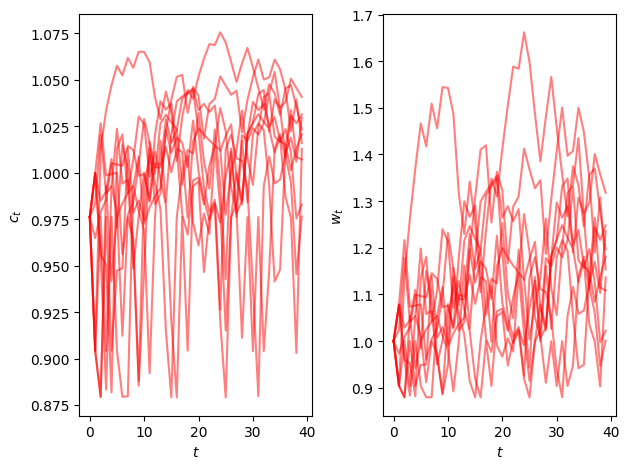

In [6]:
plt.subplot(121)
for i in range(10):
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.5)
plt.ylabel("$c_t$")
plt.xlabel("$t$")
plt.subplot(122)
for i in range(10):
    plt.plot(sim.sel(N=i,V='w'), color='red', alpha=0.5)
plt.xlabel("$t$")
plt.ylabel("$w_t$")

plt.tight_layout()

## Ergodic distribution

In [7]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

    

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 0, '$w$')

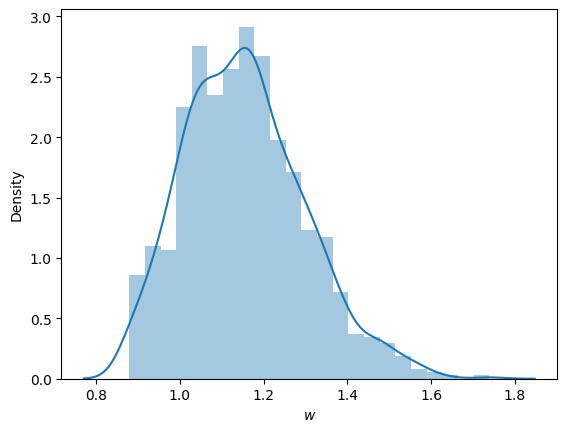

In [8]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='w'))
plt.xlabel("$w$")

## Plotting Decision Rule

In [9]:
tab = tabulate(model, dr,'w')

In [10]:
from matplotlib import pyplot as plt

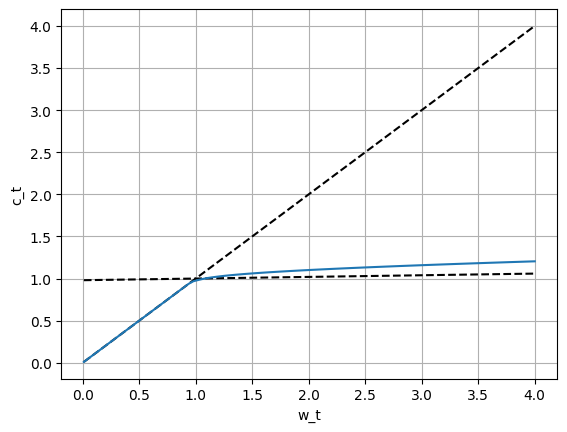

In [11]:
stable_wealth = model.eval_formula('1/r+(1-1/r)*w(0)', tab)
plt.plot(tab['w'], tab['w'],color='black', linestyle='--')
plt.plot(tab['w'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['w'], tab['c'])
plt.xlabel("w_t")
plt.ylabel("c_t")
plt.grid()